# Beautiful Graphs with Seaborn
> In a previous tutorial, we slightly covered matplotlib. Why would you want to learn Seaborn instead?
> A quick answer is that Seaborn offers a lot more features such as:
> * A dataset-oriented API for examining relationships between multiple variables
* Convenient views onto the overall structure of complex datasets
* Concise control over matplotlib figure styling with several built-in themes
* Tools for choosing color palettes that faithfully reveal patterns in your data  

> Oh yeah and the main reason is that Seaborn is a lot prettier than matplotlib!

In [155]:
# this line allows matplotlib and seaborn's plot top be shown directly in the jupyter notebook 
%matplotlib inline

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt 
sns.set()


## Introduction 
#### Why is it so important to have good and pretty visualisation tools? 
> Because nobody cares about your work if you cannot demonstrate its worth properly. 
>
#### The data we will be using
> We will be using datasets directly provided by seaborn as they offer good visualisations properties. You
>can see all the available datasets at https://github.com/mwaskom/seaborn-data



## Basic plot: the `relplot`

In [156]:
fmri_data = sns.load_dataset("gammas")
fmri_data.head(1) # what does our dataset looks like


,timepoint,ROI,subject,BOLD signal
0,0.0,IPS,0,0.513433


In [157]:
# keep only the first 5 subjects
fmri_subset = fmri_data[fmri_data.subject < 6]
fmri_subset.shape

(1800, 4)

> Now that we have the fmri data for only the first 5 subjects, let's plot it.


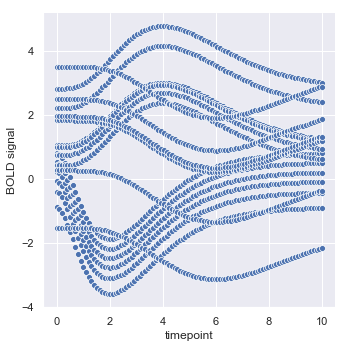

In [158]:
# timepoint is a column in our dataframe, so is BOLD signal
sns.relplot(x="timepoint", y="BOLD signal", data=fmri_subset)


### Exercise !
> Please explain why we have so many lines on our graph?



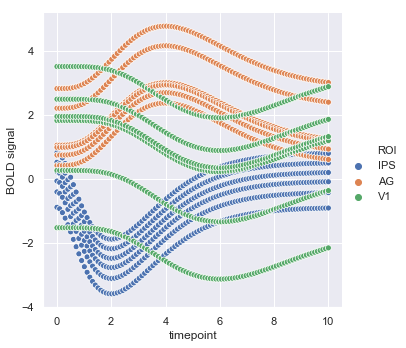

In [159]:
# ROI is also a column in our dataframe
sns.relplot\
    (x="timepoint", y="BOLD signal", hue="ROI", data=fmri_subset)

> Right, now it is easier to understand the graph. The `hue` parameters refers to which column apply a color 
>seperation on its categorial values. We need a way to also visually distinguish the subjects. We will use the 
>`style` parameter which determines how to plot the dots depending on a column and its categorical values.




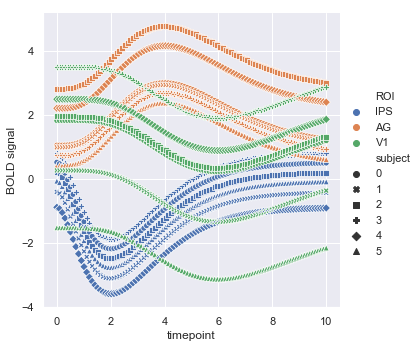

In [160]:
# the "subject" is a row in our dataframe
sns.relplot(x="timepoint", y="BOLD signal", hue="ROI", style="subject", data=fmri_subset)


> It's kind of hard to visualize the shapes of the dots, let's zoom a bit. For this task, we need to explain what are
> `FacetGrid` instances.  
> A `FacetGrid` is a multi-plot grid for plotting conditional relationships. Look at what a relplot returns:



seaborn.axisgrid.FacetGrid

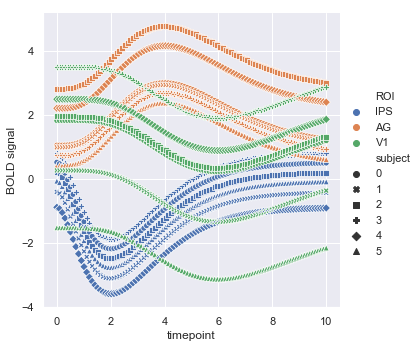

In [161]:
g = sns.relplot(x="timepoint", y="BOLD signal", hue="ROI", style="subject", data=fmri_subset)
type(g)

> Indeed, a `relplot` returns a `FacetGrid`. A `FacetGrid` is a collection of plots arranged together. Let's see a 
>simple example. 



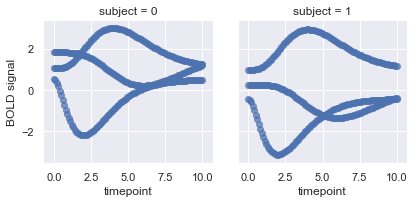

In [162]:
two_subjects = fmri_data[fmri_data.subject.isin([0,1])]

# subject is a column of two_subjects
g = sns.FacetGrid(data=two_subjects, col="subject")

# notice that we are using matplotlib.pyplot `scatter` function
# the alphas is the transparency factor in the plt.scatter function
g.map(plt.scatter, "timepoint", "BOLD signal", alpha=0.7)
g

> Let's add a bit of details on the previous plot




C:\Users\mystery\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


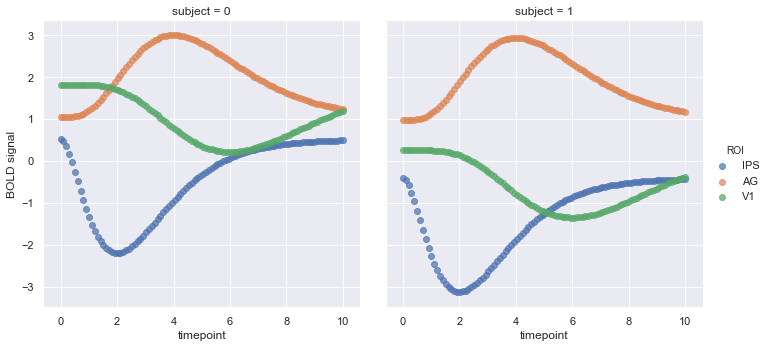

In [163]:
def plot_simple_facet(plotting_fct):
    with sns.axes_style("darkgrid"):
        g = sns.FacetGrid(data=two_subjects, col="subject", hue="ROI", size=5 )
        g.map(plotting_fct , "timepoint", "BOLD signal", alpha=0.7)
        g.add_legend() 
        return g
    
plot_simple_facet(plt.scatter)

> Let's analyse the previous cell line by line.  
> `with sns.axes_style('darkgrid'):`  
> Here we change the style of our plots momentarily (in the indented block following the `with` statement). We will go
> back to the different styles that seaborn offers later on.   
> `g = sns.FacetGrid(data=two_subjects, col="subject", hue="ROI", size=5 )`  
> Here we assign to `g` a FacetGrid with the two_subjects as the data. Then, we want to create the plot's columns 
>based on the number of values of the column subject in our dataframe. Since only 2 subjects were considered in our 
>dataframe, 2 columns will be generated (2 plots). The `hue` parameter was seen before and the `size` parameter 
>allows us to modify the size of our plots (the default value is 3).  
> `g.map(plt.scatter , "timepoint", "BOLD signal", alpha=0.7)`  
> We now map a plotting function from pyplot (`plt.scatter`) in our `FacetGrid`. The first argument is the x vector 
>for the `plt.scatter` function, the second argument is the y vector and the third argument is the alpha setting 
>which controls the opacity.  
> `g.add_legend()`  
> We manually add a legend to our `FacetGrid`.

C:\Users\mystery\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


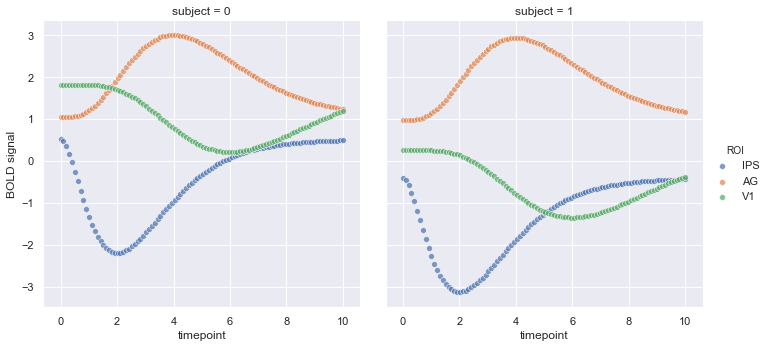

In [164]:
# trying a different plotting function
plot_simple_facet(sns.scatterplot)

C:\Users\mystery\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


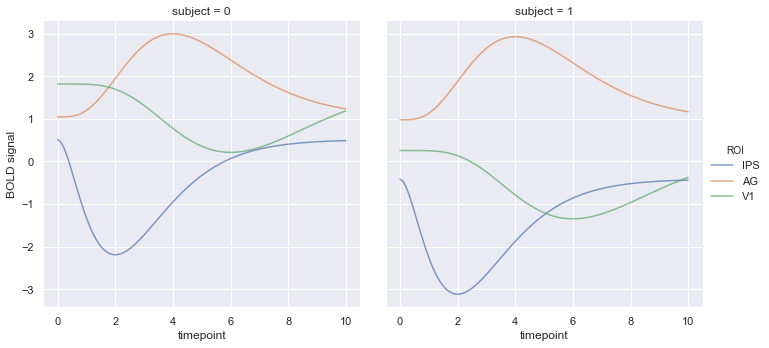

In [165]:
# trying a different plotting function
plot_simple_facet(sns.lineplot)


## Size and axes limits
> In this section, we will look at a very busy dataset and how we split it to graphically understand its content.


In [166]:
diamonds_df = sns.load_dataset("diamonds")
diamonds_df.head(1)
# let's compute the volume
diamonds_df['volume'] = diamonds_df.x * diamonds_df.y * diamonds_df.z

plotting_df = diamonds_df.drop(['carat', 'clarity', 'table', 'depth', 'x', 'y', 'z'], axis=1)

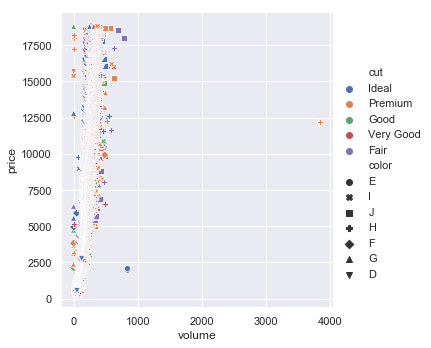

In [167]:
sns.relplot(x="volume", y="price", hue="cut", style="color", data=plotting_df)


(0, 1000)

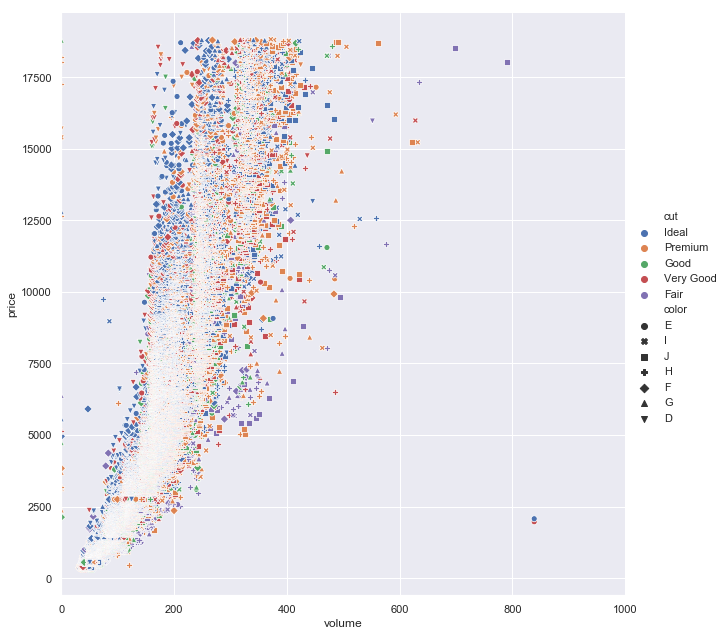

In [168]:
# default plot
g = sns.relplot(x="volume", y="price", hue="cut", style="color", height=9, aspect=1, data=plotting_df)
g.ax.set_xlim(0, 1000)


> The previous initial plot is crap, it's way to hard to interpret. Before improving it, let's start by explaining 
>the new concept and parameters introduced.  
>`height=9, aspect=1`  
>These two parameters determine the size of the plot. We kept the default value of aspect and we scaled the height 
>from the default value of 5 all the way to 9.  
>`g.ax.set_xlim(0, 1000)`  
>Here we retrieve the `ax` attribute from the `FacetGrid`. The `ax` attribute belongs to the underlying axes class 
>from `matplotlib`. Remember that `seaborn` is built on top of `matplotlib`. The complete list of attributes that you
> can use to modify your axes can be fond in the [documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib
>.pyplot.axes.html). 



C:\Users\mystery\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


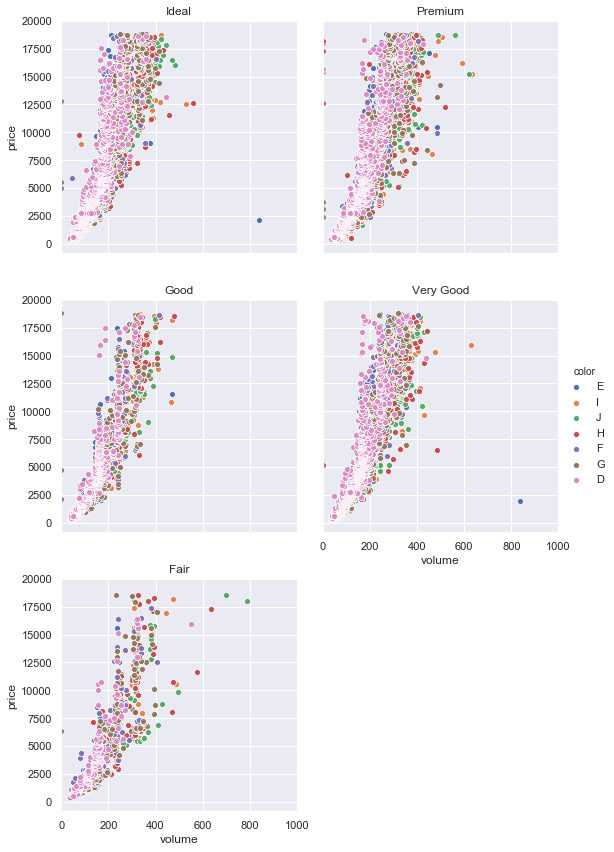

In [169]:
g = sns.FacetGrid(plotting_df, col="cut", col_wrap=2, xlim=(0,1000), hue="color", size=4)
g.map(sns.scatterplot, "volume", "price")
g.add_legend()
g.set_titles("{col_name}")

> In the previous cell, we split the original plot into 5 plots, one for each `cut`. We used the `col_wrap` attribute
> in order to get 3 rows (each row wrapped after 2 columns). 

## Visuals and aesthetics
> Now that we know how to properly set up our graphs and modify their size and shape, let's dwelve into the aesthetic
> parts of `seaborn`. 
>The most general level of control comes from the 5 preset seaborn themes: `ticks`, `white`, `dark`, `whitegrid`, 
>`darkgrid`.

In [170]:
fmri_data2 = sns.load_dataset("fmri")
single_fmri = fmri_data2[fmri_data2.subject=="s0"].drop(['event', 'region'], axis=1)
single_fmri.head(1)

,subject,timepoint,signal
14,s0,18,-0.07557


Text(0.5, 1.0, 'default: dark')

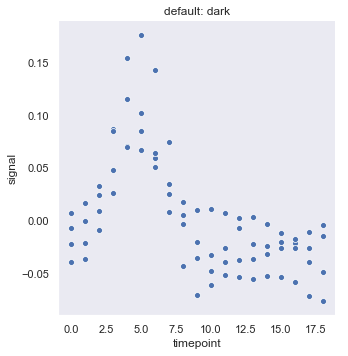

In [171]:
sns.set_style("dark")
g = sns.relplot(x="timepoint", y="signal", data=single_fmri)
g.ax.set_title("default: dark")

Text(0.5, 1.0, 'white')

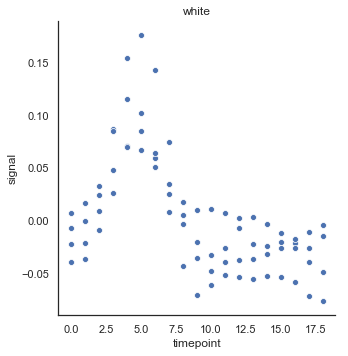

In [172]:

sns.set_style("white")

g = sns.relplot(x="timepoint", y="signal", data=single_fmri)
g.ax.set_title("white")

Text(0.5, 1.0, 'darkgrid')

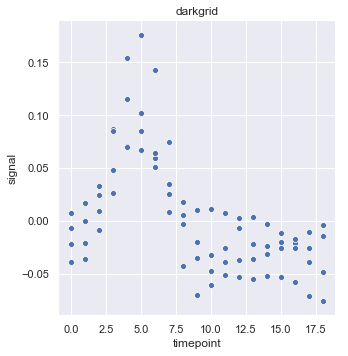

In [173]:

sns.set_style("darkgrid")

g = sns.relplot(x="timepoint", y="signal", data=single_fmri)
g.ax.set_title("darkgrid")

Text(0.5, 1.0, 'ticks')

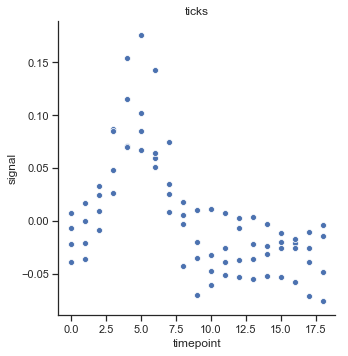

In [174]:

sns.set_style("ticks")

g = sns.relplot(x="timepoint", y="signal", data=single_fmri)
g.ax.set_title('ticks')



> If you want to temporarily modify the style, you can use a `with` statement along with the `axes_style` function.

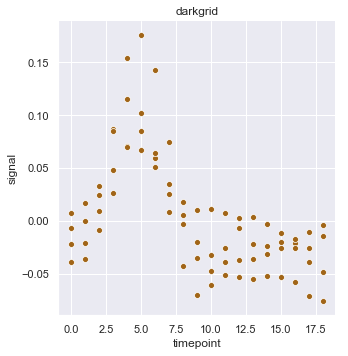

In [196]:

with sns.axes_style("darkgrid"):
    g = sns.relplot(x="timepoint", y="signal", data=single_fmri)
    g.ax.set_title('darkgrid')


In [176]:
# this is the complete list of style elements you can overwrite
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

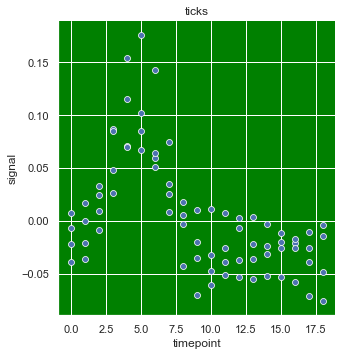

In [177]:
# for instance you can change the background color (careful, disgusting!!)
with sns.axes_style("darkgrid", {"axes.facecolor": "green"}):
    g = sns.relplot(x="timepoint", y="signal", data=single_fmri)
    g.ax.set_title('ticks')

### Exercise !
> Create a `relplot` using the single_fmri data with a white background, no spines on the axes and dark grey grid lines

> Let's see if we can embelish our plots using a different color palette...  
> There are 6 different default color palettes: `deep`, `muted`, `pastel`, `bright`, `dark` and `colorblind`. However, obviously you can create your own color palettes.

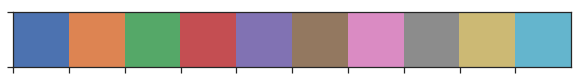

In [178]:
new_palette = sns.color_palette("deep")
sns.palplot(new_palette)



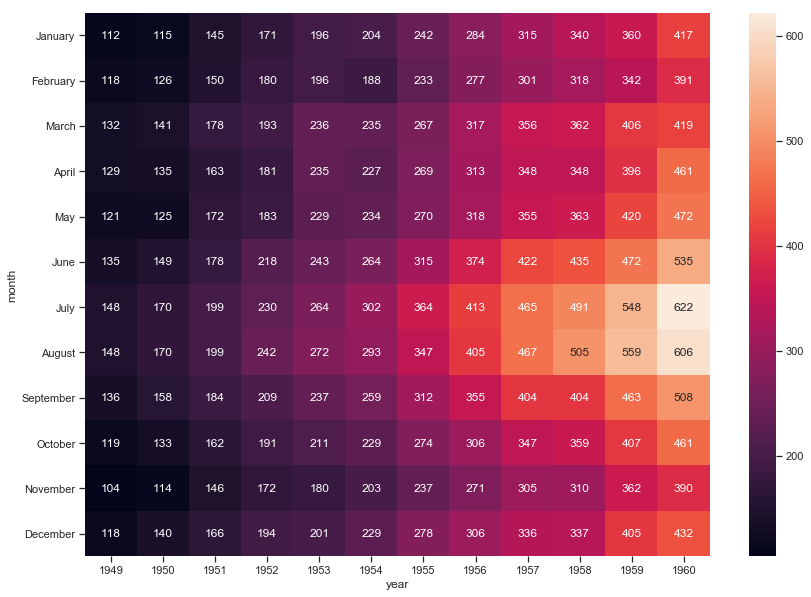

In [179]:
flights_df = sns.load_dataset("flights")

# create a pivot table from the flights dataframe
flights = flights_df.pivot(index="month", columns="year", values="passengers")

_, ax = plt.subplots(figsize=(14, 10))
# draw the heatmap
ax = sns.heatmap(flights, annot=True, fmt="d", ax=ax)




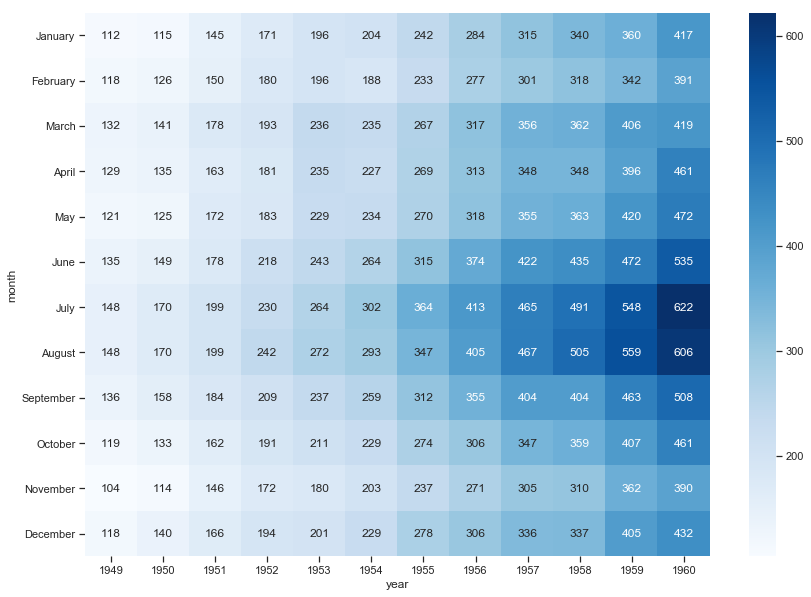

In [180]:
_, ax = plt.subplots(figsize=(14, 10))
# draw the heatmap
ax = sns.heatmap(flights, annot=True, fmt="d", cmap="Blues", ax=ax)


In [181]:
sns.set_palette("BrBG")

## Available Plot Types
> Let's see the extensive amount of plots we can use with the `seaborn` package

### CountPlots
> CountPlots can be useful to visualize the frequencies of our different categories for one variable.

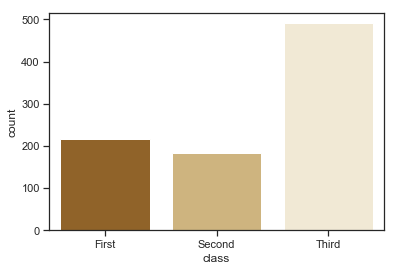

In [182]:
titanic_df = sns.load_dataset("titanic")

# let's visualize the passenger classes in the titanic
sns.countplot(x='class', data=titanic_df)

### KDE Plots
>A Kernel Density Estimation is a non-parametric way to estimate the PDF of a random variable.

In [183]:
# drop na from our dataset to plot using KDEplots
print(len(titanic_df))
print(titanic_df.isnull().sum())
titanic_df = titanic_df.dropna(subset=['age'])
len(titanic_df)

891
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


714

(0, 60)

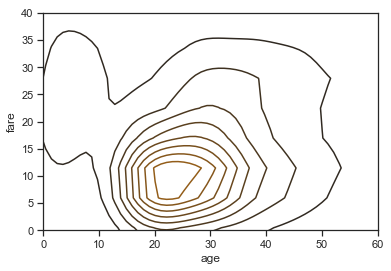

In [184]:
ax = sns.kdeplot(titanic_df.age, titanic_df.fare)
ax.set_ylim(0,40) # set the y axis range tto [0,40]
ax.set_xlim(0,60) # set the x axis range to [0,60]

(0, 300)

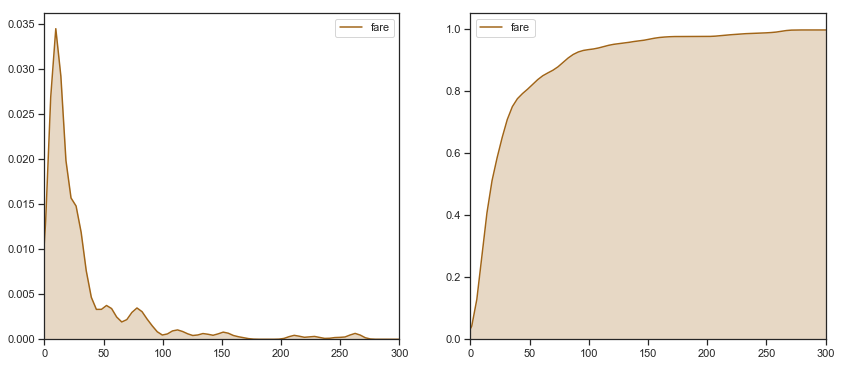

In [185]:
# let's have 2 plots side by side
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))


# we can also draw univariate KDE
ax1 = sns.kdeplot(titanic_df.fare, shade=True, ax=ax[0])
ax1.set_xlim(0, 300)

# cdf estimated by the kde 
ax2= sns.kdeplot(titanic_df.fare, shade=True, cumulative=True, ax=ax[1])
ax2.set_xlim(0,300)


> In the previous cell, we introduced few new concepts. First, we used the 2 `ax` objects  returned by `plt.subplots` since we wanted 2 plots side by side (`ncols=2`). We then used these `ax` to show our kdeplots by passing `ax[0]` and `ax[1]` to the kdeplots.  
The `shade=True` argument is used to color the area under the curve by the way.

### Distplots
A distplot is a histogram.

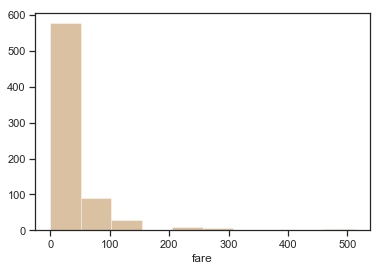

In [186]:
ax = sns.distplot(titanic_df.fare, bins=10, kde=False)

### Exercise!
> Change the color of the previous displot to *green*, limit the size of its `x` axis, add an informative title to the plot and (_bonus_: add a title to the `y` axis).

### Jointplots and hexplots
> These jointplots offer us the tools to draw bivariate plots with marginal univariate plots.

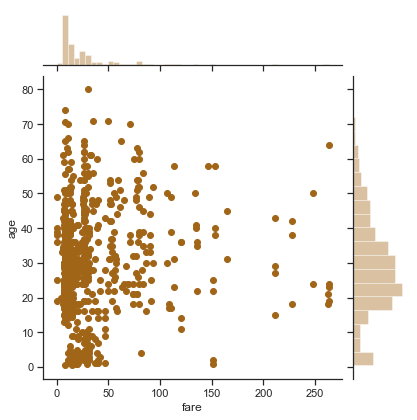

In [187]:
sns.set_style("ticks")

sns.jointplot(x='fare', y="age", data=titanic_df[titanic_df.fare < 300])

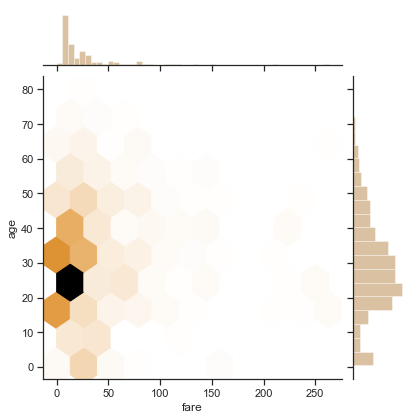

In [189]:
# `gridsize` default value is 100, it modifies the size of the hex 
sns.jointplot(x='fare', y='age', data=titanic_df[titanic_df.fare < 300], kind='hex', gridsize=10)

### Boxplots and violin plots
> A box plot displays the five-number summary of a  set of data. The five-number summary is the minimum, first quartile, median, third quartile and maximum. A box is drawn from the third quartile to the first quartile. The line in the box shows the median.

(0, 250)

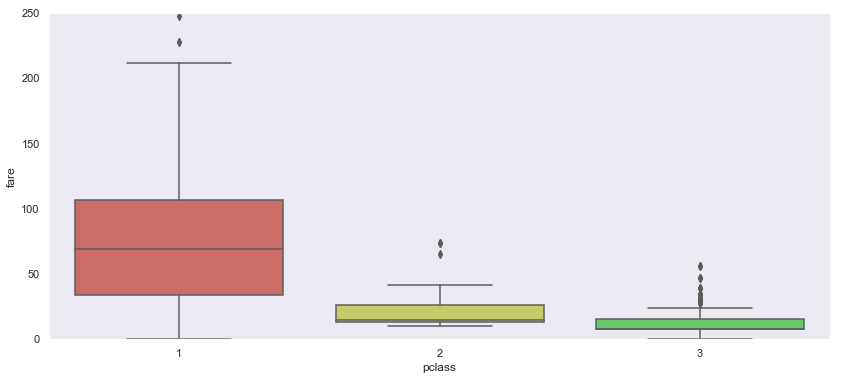

In [214]:
sns.set_palette("hls")
sns.set_style("dark")

_, temp_ax = plt.subplots(figsize=(14,6))

ax = sns.boxplot(x='pclass', y='fare', ax=temp_ax, data=titanic_df)
ax.set_ylim(0,250)

> The little dots over the boxes are the outlier. The *whiskers* around the boxes show the extent of the point beyong the center of the distribution.  
The problem with boxplots is they assume that your data is uniformly distributed, anyway at least inside the boxes.  
For most set of data, you probably want to use the more visually pleasing and informative violin plots. The violin plots replace the boxes with KDE estimates.

> It's much easier to deduce conclusions and gather information from violin plots. For instance, here, we see that there is a lot more variations in the price paid by clients in the first class. There are probably very different cabins going at different price for these customers. On the other hand, most customers in the third class paid the same amount (probably for a bunk bed in a tiny cabin).